# EDA Univariate

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis

In [2]:
data_df = pd.read_csv(r"C:\Users\PC\OneDrive\Documentos\Bootcamp\lab-eda-univariate\amz_uk_price_prediction_dataset.csv")
df = data_df.copy()
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


(2443651, 9)

In [4]:
df.isnull().sum()
# clean dataset

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [5]:
num = df.select_dtypes(include="number")
cat = df.select_dtypes(exclude="number")

In [6]:
print(num.columns)
print(cat.columns)

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')
Index(['asin', 'title', 'isBestSeller', 'category'], dtype='object')


## Part 1: Understanding Product Categories
What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [7]:
frequencies = df["category"].value_counts()
print(frequencies)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


### Frequency Tables:

In [8]:
frequencies = pd.crosstab(index=df["category"], columns="count")
frequencies = frequencies.sort_values(by="count", ascending=False).head(5)
frequencies
# 

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


### Visualizations:
Distribution of products across different categories.

C:\Users\PC\AppData\Local\Temp\ipykernel_19120\3928243844.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies["count"], palette="PuRd")


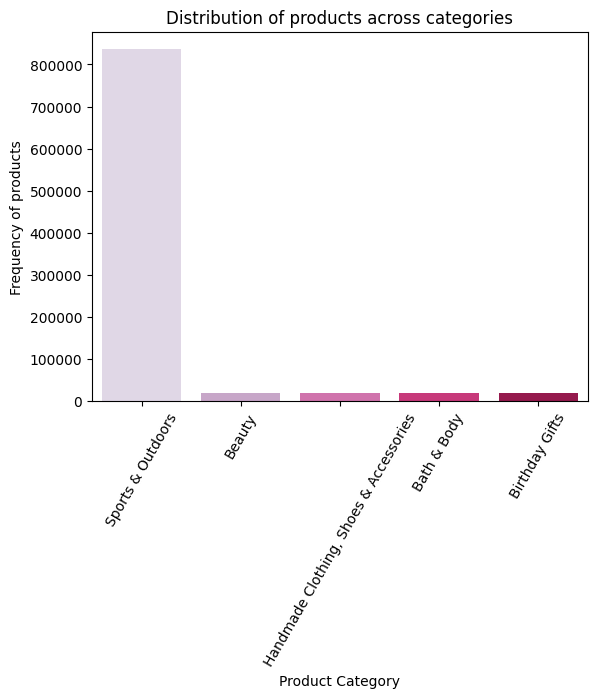

In [33]:

sns.barplot(x=frequencies.index, y=frequencies["count"], palette="PuRd")
plt.title('Distribution of products across categories')
plt.xlabel('Product Category')
plt.ylabel('Frequency of products')
plt.xticks(rotation= 60)
plt.show()

## Part 2: Delving into Product Pricing

How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

### Measures of Centrality
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [ ]:
mean_price = df["price"].mean()
median_price = df["price"].median()
mode_price = df["price"].mode()[0] # mode() returns a series, so we take the first mode if multiple
print(f"Mean price: {mean_price}, Median price: {median_price}, Mode price: {mode_price}")

Mean price: 89.24380943923663, Median price: 19.09, Mode price: 9.99


* The average price is almost 90€, but the most common price is 9.99€. This means that Amazon solds mostly cheap products but higher priced products pull the average price of products up

In [18]:
if mean_price > mode_price:
    print("The average price is higher than the most common price.")
elif mean_price < mode_price:
    print("The average price is lower than the most common price.")
else:
    print("The average and the most common price are the same.")


The average price is higher than the most common price.


### Measures of Dispersion
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [41]:
variance = df["price"].var()
std_dev = df["price"].std()
range_price = df["price"].max() - df["price"].min()
#IQR
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
print(f"Range of prices: {range_price}, Variance: {variance}, Standard Deviation: {std_dev}, Interquartile Range (IQR): {IQR}")

Range of prices: 100000.0, Variance: 119445.48532254907, Standard Deviation: 345.60886175349884, Interquartile Range (IQR): 36.0


* Yes, there is a significant spread in price, seen by a high range of prices (100,000).

### Visualitation
Are there products that are priced significantly higher than the rest?

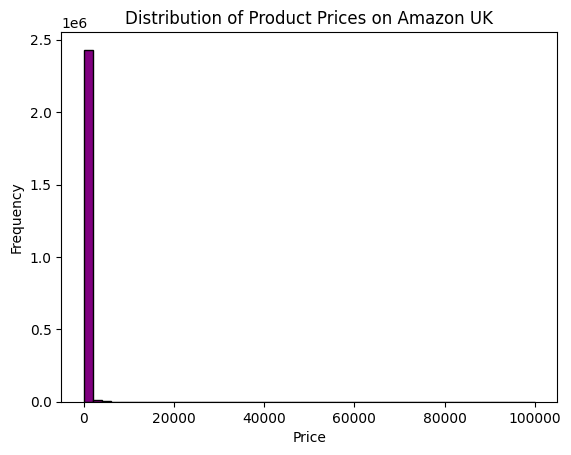

In [34]:
df['price'].plot(kind='hist', bins=50, color='purple', edgecolor='black')
plt.title("Distribution of Product Prices on Amazon UK")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

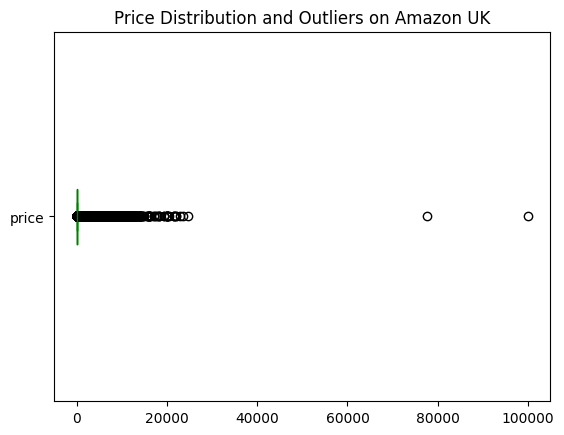

In [23]:
df['price'].plot(kind='box', vert=False, color='green')
plt.title("Price Distribution and Outliers on Amazon UK")
plt.show()

* It is hard to read the histogram as the distribution is not well visualized. This might be because of outliers and a high frequency of lower priced products.

## Part 3: Unpacking Product Ratings

How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

### Measures of centrality
How do customers generally rate products? Is there a common trend?

In [28]:
mean_rating = df["stars"].mean()
median_rating = df["stars"].median()
mode_rating = df["stars"].mode()[0]
print(f"mean of rating:{mean_rating}, median of rating:{median_rating}, mode of rating:{mode_rating}")

mean of rating:2.152836472966065, median of rating:0.0, mode of rating:0.0


* No, there is no common trend. The rating is pretty equally distrubuted with a mean of 2.15.

### Measures of Dispersion
Are the ratings consistent, or is there a wide variation in customer feedback?

In [30]:
variance_rating = df["stars"].var()
std_dev_rating = df["stars"].std()
range_rating = df["stars"].max() - df["stars"].min()
Q1_rating = df["stars"].quantile(0.25)
Q3_rating = df["stars"].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating
print(f"IQR of ratings: {IQR_rating}")
print(f"Range of ratings: {range_rating}")

IQR of ratings: 4.4
Range of ratings: 5.0


* No, there is only a small variation in rating due to a given range of 0-5 stars only

### Shape of the Distribution
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [35]:
skewness_rating = df["stars"].skew()
kurtosis_rating = df["stars"].kurtosis()
print(f"Skewness of ratings: {skewness_rating}, Kurtosis of ratings: {kurtosis_rating}")

Skewness of ratings: 0.08120735761080985, Kurtosis of ratings: -1.9260061280432985


* The skewness of 0.08 points to a normal distriubtion of values. The kurtosis of almost -2 points to a equally, broad distrubution which is indicated by a kurtosis

### Visualitazion
Is there a specific rating that is more common?

Text(0.5, 1.0, 'Distribution of Product Ratings on Amazon UK')

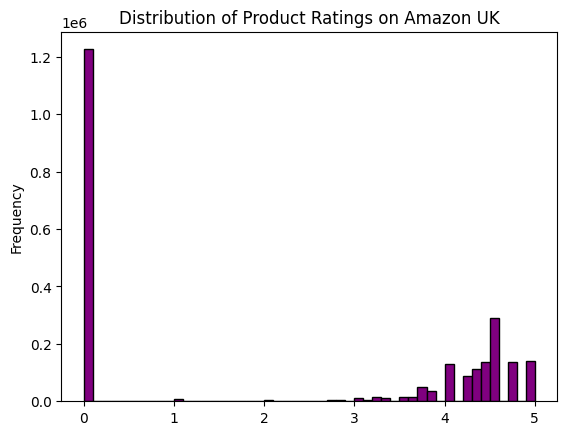

In [36]:
df['stars'].plot(kind='hist', bins=50, color='purple', edgecolor='black')
plt.title("Distribution of Product Ratings on Amazon UK")

* Yes, 0 is the most common, probaly due to most customers not rating the products, in that case a 0 is allocated